<a href="https://colab.research.google.com/github/vishnuraj-git/DataAnalytics/blob/main/project_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Take a copy of original dataset.

In [3]:
main_df = pd.read_csv("/content/drive/MyDrive/Latest Covid-19 India Status.csv")
df = main_df.copy()

In [ ]:
# Shape of the dataset
df.shape

(36, 8)

In [ ]:
# Getting list of all columns present in the dataframe
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

In [ ]:
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.10,1.71
1,Andhra Pradesh,1952513,22358,1916914,13241,1.15,98.18,0.68
2,Arunachal Pradesh,45703,4465,41025,213,9.77,89.76,0.47
3,Assam,557437,15726,536597,5114,2.82,96.26,0.92
4,Bihar,724390,530,714223,9637,0.07,98.60,1.33


In [ ]:
df.tail()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
31,Telengana,640659,9625,627254,3780,1.50,97.91,0.59
32,Tripura,76315,3934,71642,739,5.15,93.88,0.97
33,Uttar Pradesh,1708152,932,1684471,22749,0.05,98.61,1.33
34,Uttarakhand,341673,611,333703,7359,0.18,97.67,2.15
35,West Bengal,1522833,11891,1492878,18064,0.78,98.03,1.19


In [ ]:
# Checking for the duplicated value

df.duplicated().sum()

0

In [ ]:
# Checking for any missing value

df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [ ]:
# Replacing long name by short name

df = df.replace('Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu')
df.head(8)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.10,1.71
1,Andhra Pradesh,1952513,22358,1916914,13241,1.15,98.18,0.68
2,Arunachal Pradesh,45703,4465,41025,213,9.77,89.76,0.47
3,Assam,557437,15726,536597,5114,2.82,96.26,0.92
4,Bihar,724390,530,714223,9637,0.07,98.60,1.33
5,Chandigarh,61922,32,61081,809,0.05,98.64,1.31
6,Chhattisgarh,1001037,2789,984737,13511,0.28,98.37,1.35
7,Daman and Diu,10637,48,10585,4,0.45,99.51,0.04


In [ ]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [ ]:
# Statistical measurement of the dataset

df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.714417e+05,4.599578e+04,8.484205e+05,11681.972222,2.665833,96.074722,1.260000
std,1.255645e+06,2.303794e+05,1.213779e+06,22587.031797,4.985038,4.877221,0.565241
min,7.525000e+03,1.400000e+01,7.382000e+03,4.000000,0.020000,74.610000,0.040000
25%,6.159075e+04,4.830000e+02,5.952950e+04,791.500000,0.122500,96.327500,0.935000
50%,4.521775e+05,1.275000e+03,4.390575e+05,5119.000000,0.750000,97.915000,1.330000
75%,9.745455e+05,9.781500e+03,9.543658e+05,13308.500000,2.040000,98.602500,1.617500
max,6.258079e+06,1.386262e+06,6.029817e+06,131429.000000,24.950000,99.510000,2.720000


In [ ]:
#correlations within variables
df.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
Total Cases,1.000000,0.386029,0.999919,0.915217,-0.195362,0.187941,0.101944
Active,0.386029,1.000000,0.378549,0.099266,0.056235,-0.031479,-0.224457
Discharged,0.999919,0.378549,1.000000,0.914909,-0.200224,0.192844,0.102526
Deaths,0.915217,0.099266,0.914909,1.000000,-0.169711,0.139060,0.297156
Active Ratio (%),-0.195362,0.056235,-0.200224,-0.169711,1.000000,-0.993689,-0.247546
Discharge Ratio (%),0.187941,-0.031479,0.192844,0.139060,-0.993689,1.000000,0.137311
Death Ratio (%),0.101944,-0.224457,0.102526,0.297156,-0.247546,0.137311,1.000000


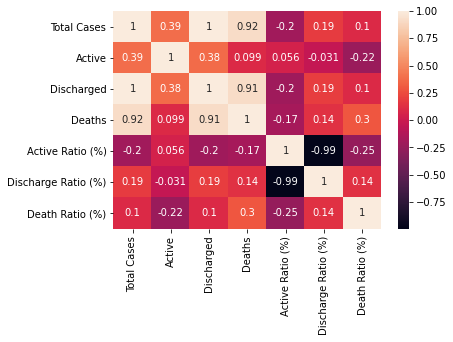

In [ ]:
# Visualization of correlations between data

sns.heatmap(df.corr(), annot=True)

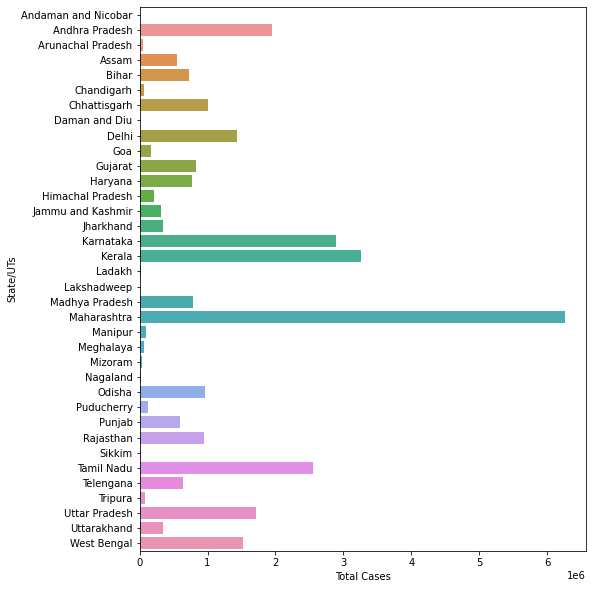

In [ ]:
# Barplot using seaborn

plt.figure(figsize=(8, 10))
sns.barplot(data = df, y="State/UTs", x="Total Cases")

In above plot we can see that Maharastra have maximum number of covid cases.

In [ ]:
#relating the variables with Scatterplots
px.scatter(df, x='Active Ratio (%)',y='Death Ratio (%)', color=df['State/UTs'])

Here we can see that have the highest Active Ratio i.e 24.95%.
we can again see that Punjab have highest Death Ratio of 2.72%, while its active ratio is 0.13%.

In [ ]:
fig = px.scatter_matrix(df, dimensions=["Total Cases", "Active", "Discharged", "Deaths"], color=df['State/UTs'])
fig.show()

Above graph shows us the relationship between different variables of all states of India.

In [ ]:
fig = px.pie(df, values='Total Cases', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

Above graph shows us that more than 50% of covid cases in india are coming only from 4 to 5 states.

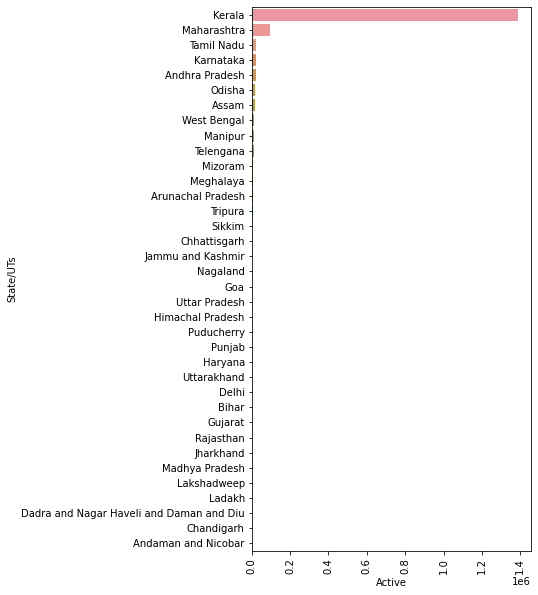

In [ ]:
#Active Cases - State/UTs
plt.figure(figsize=(5,10))
data = df.sort_values(by=['Active'],ascending=False)
sns.barplot(x=data['Active'],y=data['State/UTs'])
plt.xticks(rotation=90)
plt.xlabel('Active')
plt.ylabel('State/UTs')
plt.show()

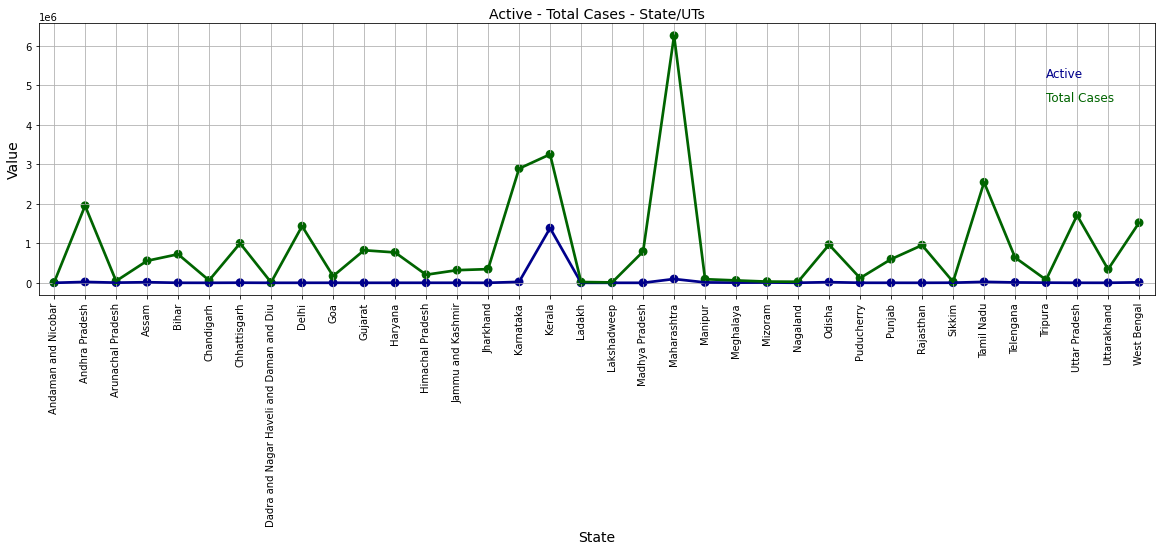

In [16]:
#Active - Total Cases - State/UTs
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.pointplot(x='State/UTs',y='Active',data=df,color='darkblue')
sns.pointplot(x='State/UTs',y='Total Cases',data=df,color='darkgreen')

plt.text(32,5200000,'Active',color='darkblue',fontsize=12)
plt.text(32,4600000,'Total Cases',color='darkgreen',fontsize=12)

plt.xlabel('State',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title('Active - Total Cases - State/UTs',fontsize=14)
plt.grid()

<BarContainer object of 36 artists>

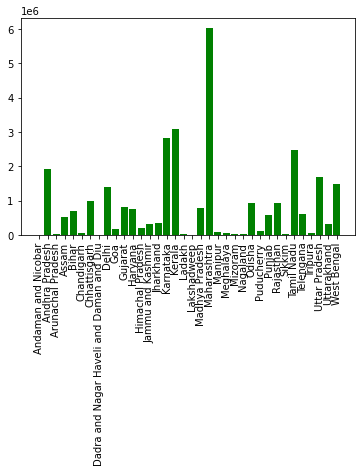

In [5]:
#Discharged
plt.xticks(rotation=90)
plt.bar(df['State/UTs'],height=df['Discharged'],color = 'green')

<BarContainer object of 36 artists>

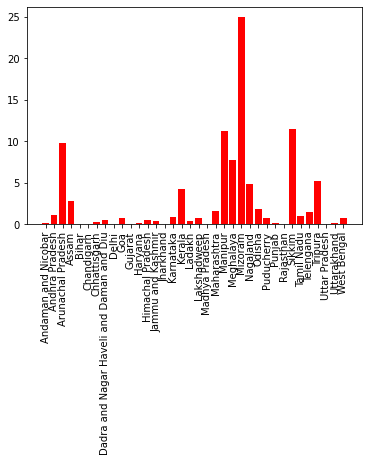

In [12]:
#Active Ratio
plt.xticks(rotation=90)
plt.bar(df['State/UTs'],height=df['Active Ratio (%)'],color = 'red')

**Q1)Active cases in india?**


In [ ]:
df.Active.sum()

1655848

**Q2)Total Number of covid death in India?**

In [ ]:
df.Deaths.sum()

420551

**Q3)State having highest number of Covid cases in India.**

In [ ]:
highest_cases = df[df['Total Cases'] == max(df['Total Cases'])]
highest_cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6258079,96833,6029817,131429,1.55,96.35,2.1


**Q4)State having Lowest number of covid cases in India.**

In [ ]:
lowest_cases = df[df['Total Cases'] == min(df['Total Cases'])]
lowest_cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.1,1.71


<BarContainer object of 36 artists>

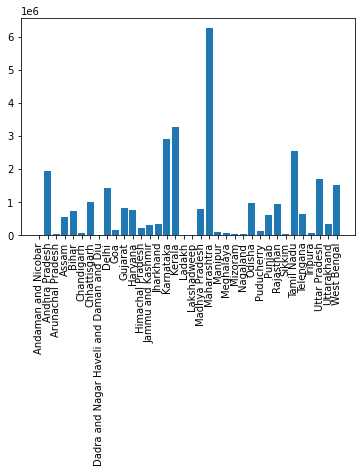

In [ ]:
plt.xticks(rotation=90)
plt.bar(df['State/UTs'],height=df['Total Cases'])

Highest total cases are in Maharashtra and 
Lowest total cases are in Andaman and Nicobar

**Q5)Top 5 total cases in the country?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


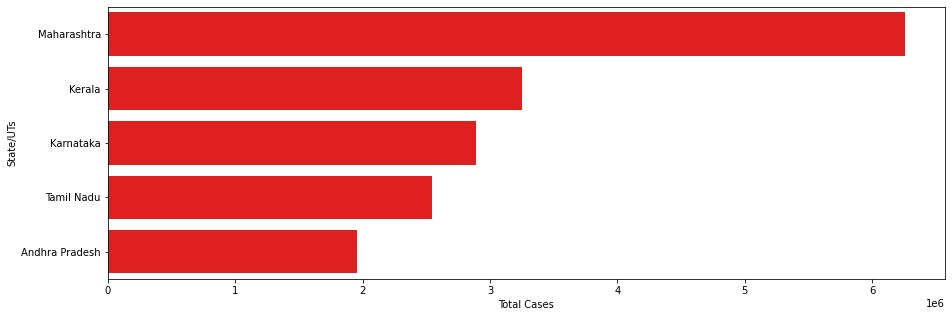

In [ ]:

top_5 = df.sort_values(by=['Total Cases'], ascending=False).head()

plt.figure(figsize=(15,5))
Total = sns.barplot(top_5['Total Cases'], top_5['State/UTs'], color = 'red', label='Total Cases')

**Q6)State having highest number of Active cases in India.**

In [ ]:
highest_active = df[df['Active'] == max(df['Active'])]
highest_active

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
16,Kerala,3254064,1386262,3099469,15969,4.26,95.25,0.49


**Q7)State having Lowest number of Active cases in India.**

In [ ]:
lowest_active = df[df['Active'] == min(df['Active'])]
lowest_active

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.1,1.71


<BarContainer object of 36 artists>

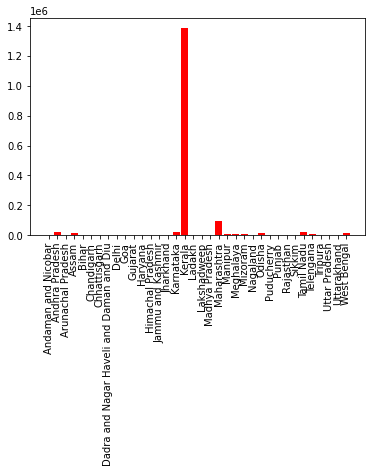

In [ ]:
plt.xticks(rotation=90)
plt.bar(df['State/UTs'],height=df['Active'],color = 'red')

Highest active cases are in Kerala and
Lowest active cases are in Andaman and Nicobar

**Q8)State having highest number of death ratio in India?**

In [ ]:
highest_death_ratio = df[df['Death Ratio (%)'] == max(df['Death Ratio (%)'])]
highest_death_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
27,Punjab,598741,771,581712,16258,0.13,97.16,2.72


**Q9)State having lowest number of death ratio in India?**

In [ ]:
lowest_death_ratio = df[df['Death Ratio (%)'] == min(df['Death Ratio (%)'])]
lowest_death_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Daman and Diu,10637,48,10585,4,0.45,99.51,0.04


<BarContainer object of 36 artists>

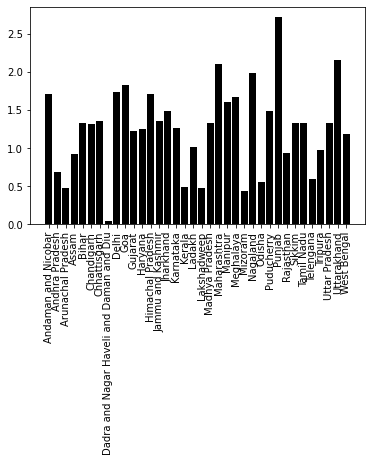

In [ ]:
#DEATH RATIO
plt.xticks(rotation=90)
plt.bar(df['State/UTs'],height=df['Death Ratio (%)'],color = 'Black')

**Q10)Top 5 dicharge reported state in india?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


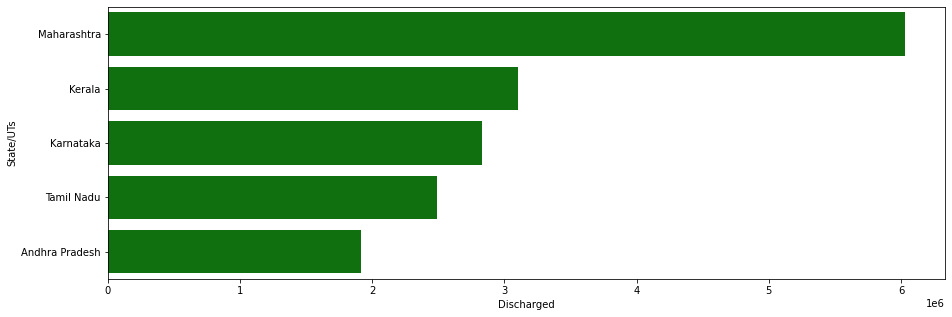

In [ ]:
top_5 = df.sort_values(by=['Discharged'], ascending=False).head()

plt.figure(figsize=(15,5))
Total = sns.barplot(top_5['Discharged'], top_5['State/UTs'], color = 'green', label='Discharged')

**Q11)State having highest discharge ratio in India?**

In [ ]:

highest_discharge_ratio = df[df['Discharge Ratio (%)'] == max(df['Discharge Ratio (%)'])]
highest_discharge_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Daman and Diu,10637,48,10585,4,0.45,99.51,0.04


**Q12)State having lowest discharge ratio in India?**

In [ ]:
lowest_discharge_ratio = df[df['Discharge Ratio (%)'] == min(df['Discharge Ratio (%)'])]
lowest_discharge_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
23,Mizoram,31145,7772,23238,135,24.95,74.61,0.43


<BarContainer object of 36 artists>

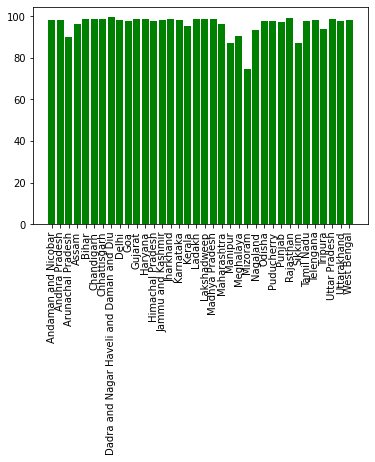

In [ ]:
plt.xticks(rotation=90)
plt.bar(df['State/UTs'],height=df['Discharge Ratio (%)'],color = 'Green')

Highest no of discharged people are in Maharashtra
Lowest no of discharged people are in Andaman and Nicobar

**Q13)Sort the entire data wrt to No.of Confirmed cases in ascending order**

In [ ]:
df.sort_values(by='Active',ascending=True,ignore_index=True)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.10,1.71
1,Chandigarh,61922,32,61081,809,0.05,98.64,1.31
2,Daman and Diu,10637,48,10585,4,0.45,99.51,0.04
3,Ladakh,20296,68,20021,207,0.34,98.65,1.02
4,Lakshadweep,10127,81,9997,49,0.80,98.72,0.48
5,Madhya Pradesh,791738,149,781077,10512,0.02,98.65,1.33
6,Jharkhand,346918,276,341518,5124,0.08,98.44,1.48
7,Rajasthan,953522,328,944242,8952,0.03,99.03,0.94
8,Gujarat,824683,342,814265,10076,0.04,98.74,1.22
9,Bihar,724390,530,714223,9637,0.07,98.60,1.33


**Q14)Sort the entire data wrt to No.of death in descending order**

In [ ]:
df.sort_values(by='Deaths',ascending=False,ignore_index=True)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6258079,96833,6029817,131429,1.55,96.35,2.10
1,Karnataka,2893556,23928,2833276,36352,0.83,97.92,1.26
2,Tamil Nadu,2546689,24025,2488775,33889,0.94,97.73,1.33
3,Delhi,1435844,587,1410216,25041,0.04,98.22,1.74
4,Uttar Pradesh,1708152,932,1684471,22749,0.05,98.61,1.33
5,West Bengal,1522833,11891,1492878,18064,0.78,98.03,1.19
6,Punjab,598741,771,581712,16258,0.13,97.16,2.72
7,Kerala,3254064,1386262,3099469,15969,4.26,95.25,0.49
8,Chhattisgarh,1001037,2789,984737,13511,0.28,98.37,1.35
9,Andhra Pradesh,1952513,22358,1916914,13241,1.15,98.18,0.68


**Q15)List out states which has death ratio above 2%**

In [ ]:
death_ratio_2 = df[df['Death Ratio (%)'] >2]
death_ratio_2

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6258079,96833,6029817,131429,1.55,96.35,2.10
27,Punjab,598741,771,581712,16258,0.13,97.16,2.72
34,Uttarakhand,341673,611,333703,7359,0.18,97.67,2.15
